### Tommaso Armadillo matr. 885460

# <span style="color:red"> Numerical Exercise 1</span>

## <span style="color:blue"> Exercise 1.1</span>
#### Scope
The scope of this first exercise was to test the Pseudo-Random Number generator downloaded from the NSL Ariel web site estimating $\langle r \rangle = \int_0^1 r dr = 1/2$ and $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ (i.e. mean value and variance of random number from a uniform distribution). Then make a picture of the estimated value of $\langle r \rangle$ and $\langle (r-1/2)^2 \rangle$ along with their uncertainty (which corresponds to Standard Deviation of the mean). For this task we used a large number of *throws* $M$ ($M = 10^4$) divided in $N$ blocks (i.e. using the <i>blocking method</i>).

In the last parte of the exercise1.1 we had to generate $n=10^4$ random numbers between 0 and 1, then divide the interval $\lbrack0,1\rbrack$ in $M=10^2$ sub-intervals and count how many random numbers $n_i$ there were in every interval. So we calculated the value of $\chi^2$: 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the mean value for $\chi^2$ should be equal to the number of sub-intervals.
We repeated the calculation 100 times.

#### Instruction to compile
Code is in the folder <font face = "Courier"> Esercizio1.1 </font>. It can be compiled using <font face = "Courier"> `$make` </font> and executed with <font face = "Courier"> `$./main.cpp` </font>. There is also the possibility to use <font face = "Courier"> `$make clean`</font>. It produces three files as output: the first one (<i>'Mean.txt'</i>) contains the mean value with is uncertainty as a function of the number of blocks, the second one (<i>'Variance.txt'</i>) contains the mean value of the variance, with his uncertainty, and the third one (<i>'CHI2.txt'</i>) the value of $\chi^2$

#### Mean value

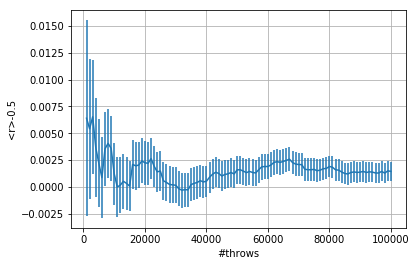

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y, error = np.loadtxt("Esercizio1.1/Mean.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y-0.5,yerr=error)
plt.xlabel('#throws')
plt.ylabel('<r>-0.5')
plt.grid(True)
plt.show()


This is the output for the mean value and Standard Deviation of the mean for the estimation of $\langle r \rangle$, we can clearly see that the average value of $\langle r \rangle - 1/2$ converges to 0 when <i>#throws</i> becomes bigger, and the error bar decrease in magnitude, as we expected. Actually 0 is not included in the error bar, but it's not a problem beacuse only in 68% of the cases it will end in the error bars, 95% of times will end in 2 error bar (which is our case). So, in the end, the value we found is compatible with $\langle r \rangle = \int_0^1 r dr = 1/2$.

#### Variance
In order to calculate $\sigma^2$ we used the same code as the previous task and instead of generating random numbers between 0 and 1 and then calculate mean and Standard Deviation of the mean of this numbers, I generated a number $r$ between 0 and 1 (uniformly distributed) and then calculate $\sigma^2 =  (r-1/2)^2$. So I repeated the previous calculation (mean value and STD of mean) on $\sigma^2$.

I produced a text file called <font face = "Courier"> `Variance.txt` </font> and the results are plotted below:


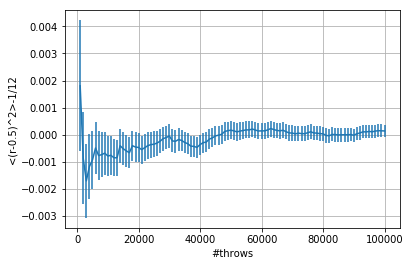

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y, error = np.loadtxt("Esercizio1.1/Variance.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y-1/12,yerr=error)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

We can see that the average value of $\langle (r-1/2)^2 \rangle - 1/12$ converges to 0 when <i>#throws</i> becomes bigger, and the error bar decrease in magnitude, as we expected. This time 0 is included in the error bar, so we conclude that $\sigma^2 = \langle (r-1/2)^2 \rangle = 1/12$ is compatible with what we estimated using Monte Carlo Methods.

#### $\chi^2$ test
Below we plotted the the 100 values for $\chi^2$ we have calculated.

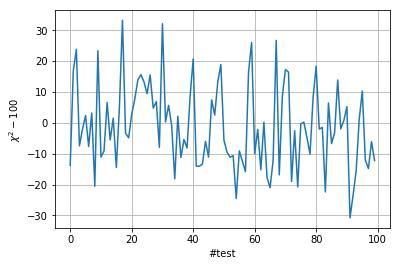

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y= np.loadtxt("CHI2.txt", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y-100)
plt.xlabel('#test')
plt.ylabel('$\chi^2-100$')
plt.grid(True)
plt.show()



We see that the 100 values for $\chi^2-100$ we estimated, distribute around 0. So it's possible that the numbers we generated comes from a uniform distribution between 0 and 1. If we would have found higher mean value for $\chi^2$ it would be rather unlikely that the $n_i$ come from a uniform distribution.

## <span style="color:blue"> Exercise 1.2</span>
#### Scope
The scope of the Exercise1.2 was to extend the random number generator adding the possibility to generate numbers from dice (integers 1 to 6), numbers from an exponential distribution, and from a Lorentz distribution. For the first case we generate a double from $[1,7)$ and then we put if in a int variable. For the other two cases we used the method of the inversion of the cumulative distribution. So to obtain a number distributed according to an exponential distribution $p(x)=\lambda e^{-\lambda x}$ with $x\in [0;+\infty]$ we calculate the cumulative function:
$$ F(x) = \int_{0}^{x}p(t)dt=\int_{0}^{x}\lambda e^{-\lambda t}dt = -e^{-\lambda t}\bigg|_{t=0}^{t=x}=1-e^{-\lambda x}$$
and we invert this function
$$F(x)=1-e^{-\lambda x} = y$$

$$1-y=e^{-\lambda x}$$

$$ x=-\frac{1}{\lambda}\ln(1-y) $$
If y comes from a uniform distribution in $[0,1)$ then x follow an exponential distribution.

In the same way we calculate the cumulative function for the Lorentz distribution and invert it:
$$ F(x) = \int_{-\infty}^{x}\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}= \frac{1}{\pi}\arctan\big(\frac{x-\mu}{\Gamma}\big)+\frac{1}{2} = y$$

$$x=\Gamma \tan \big[\pi \big(y-\frac{1}{2}\big) \big] +\mu$$

For each case we generate $10^4$ random number and we plot them in a histogram. Then we generate other $N*10^4$ numbers and we plot in the histogram $S_N=\frac{1}{N}\sum_{1}^{N}x_i$, with $x_i$ random number originated fron a dice, exponential or lorentz distribution and $N=2,10,100$ 

For the Central Limit Theorem we expect that for $N$ that becomes bigger and bigger the distribution of $S_N$ approaches a gaussian one or another limit distribution.

#### Instruction to compile
Code is in the folder <font face = "Courier"> Esercizio1.2 </font>. It can be compiled using <font face = "Courier"> `$make` </font> and executed with <font face = "Courier"> `$./main.cpp` </font>. There is also the possibility to use <font face = "Courier"> `$make clean`</font>. It produces three files as output: 'Dice.txt', 'Exp.txt' and 'Lorentz.txt'.

#### Dice

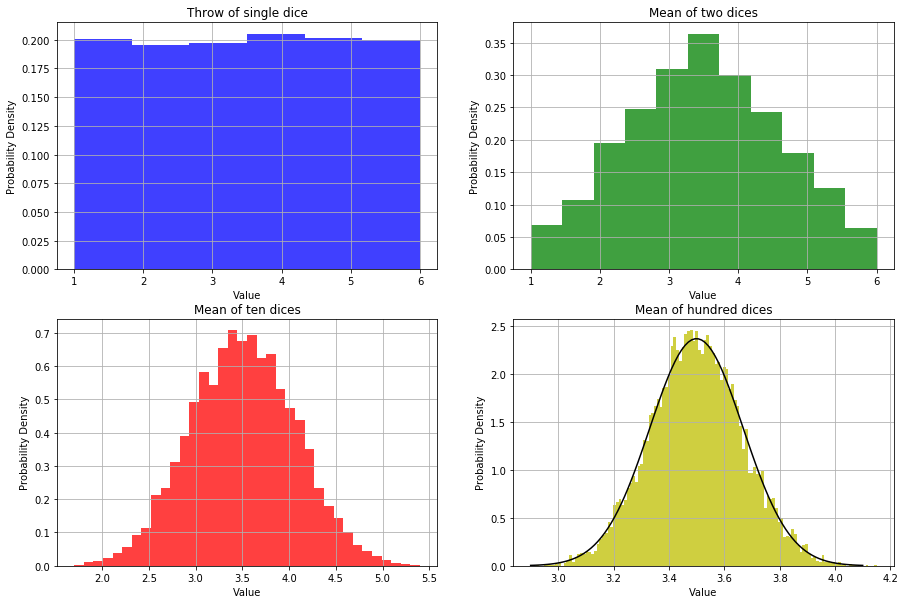

In [39]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

with open("Esercizio1.2/Dice.txt") as f:
    dice_1 = [float(next(f)) for x in range(10000)]
    dice_2 = [float(next(f)) for x in range(10000)]
    dice_10 = [float(next(f)) for x in range(10000)]
    dice_100 = [float(next(f)) for x in range(10000)]

# the histogram of the data
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

ax[0][0].hist(dice_1, 6, density=True, facecolor='b', alpha=0.75)
ax[0][1].hist(dice_2, 11, density=True, facecolor='g', alpha=0.75)
ax[1][0].hist(dice_10, 36, density=True, facecolor='r', alpha=0.75)
ax[1][1].hist(dice_100, 124, density=True, facecolor='y', alpha=0.75)

ax[0][0].set_title('Throw of single dice')
ax[0][1].set_title('Mean of two dices')
ax[1][0].set_title('Mean of ten dices')
ax[1][1].set_title('Mean of hundred dices')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('Value')
        ax[i][j].set_ylabel('Probability Density')
        ax[i][j].grid(True) 

#fit with a gaussian
P = ss.norm.fit(dice_100)
rX = np.linspace(2.9,4.1, 100)
rP = ss.norm.pdf(rX, *P)
plt.plot(rX, rP, color='black')

plt.show()

As we expected a single dice is uniformly distributed between 1 and 6 (blue figure), but as soon as we increase $N$ the histogram starts assuming a gaussian shape (green, red and yellow). The yellow one, originated from $S_{100} = 1/100 \sum_{i=1}^{100}x_i$ with $x_i$ an integer between 1 and 6, fits very well with a Gaussian (black line), as the Central Limit Theroem predicts.

#### Exponential

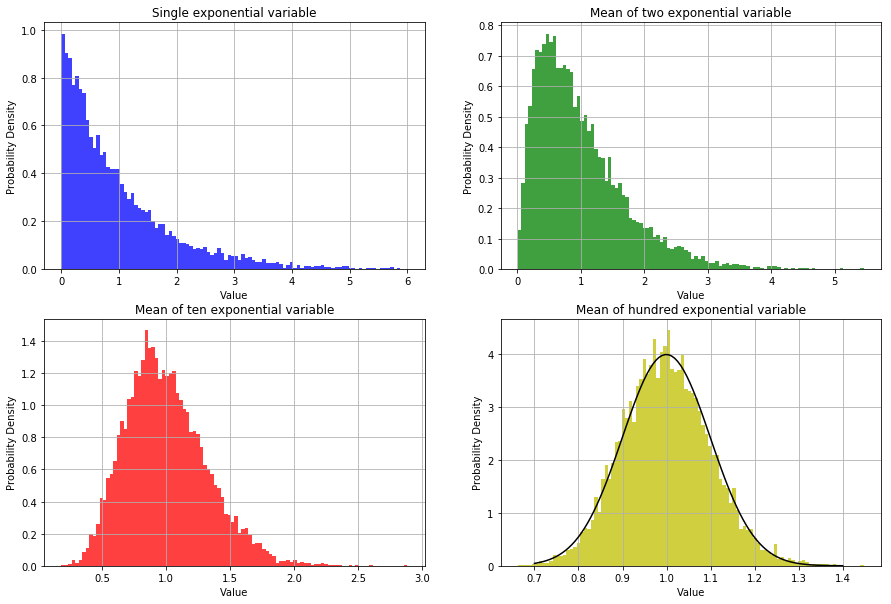

In [43]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

with open("Esercizio1.2/Exp.txt") as f:
    exp_1 = [float(next(f)) for x in range(10000)]
    exp_2 = [float(next(f)) for x in range(10000)]
    exp_10 = [float(next(f)) for x in range(10000)]
    exp_100 = [float(next(f)) for x in range(10000)]

# the histogram of the data
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

ax[0][0].hist(exp_1, 100, range = [0,6], density=True, facecolor='b', alpha=0.75)
ax[0][1].hist(exp_2, 100, density=True, facecolor='g', alpha=0.75)
ax[1][0].hist(exp_10, 100, density=True, facecolor='r', alpha=0.75)
ax[1][1].hist(exp_100, 100, density=True, facecolor='y', alpha=0.75)

ax[0][0].set_title('Single exponential variable')
ax[0][1].set_title('Mean of two exponential variable')
ax[1][0].set_title('Mean of ten exponential variable')
ax[1][1].set_title('Mean of hundred exponential variable')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('Value')
        ax[i][j].set_ylabel('Probability Density')
        ax[i][j].grid(True)

#fit with a gaussian
P_exp = ss.norm.fit(exp_100)
rX_exp = np.linspace(0.7,1.4, 100)
rP_exp = ss.norm.pdf(rX_exp, *P_exp)
plt.plot(rX_exp, rP_exp, color='black')        
plt.show()

If we consider only one exponential variable (blue) the histogram has the characteristic profile of an exponential distribution, so we implemented properly the generator for an exponential distribution. As we increase the number of variables among which we calculate the mean $S_N$ the profile of the histogram change towards a guassian one (CLT).

#### Lorentzian

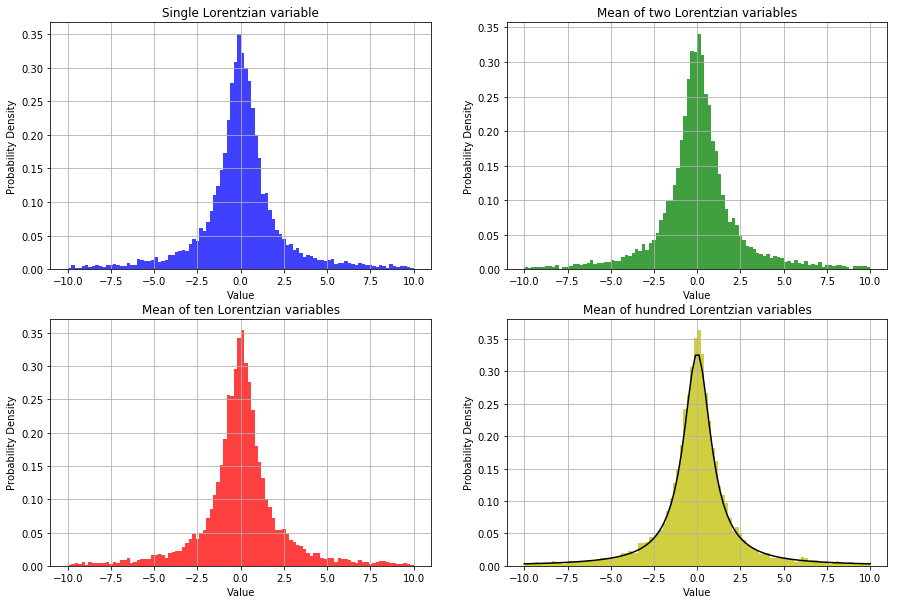

In [60]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

with open("Esercizio1.2/Lorentz.txt") as f:
    lor_1 = [float(next(f)) for x in range(10000)]
    lor_2 = [float(next(f)) for x in range(10000)]
    lor_10 = [float(next(f)) for x in range(10000)]
    lor_100 = [float(next(f)) for x in range(10000)]

# the histogram of the data
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots(2,2)

ax[0][0].hist(lor_1, 100, range = [-10,10], density=True, facecolor='b', alpha=0.75)
ax[0][1].hist(lor_2, 100, range = [-10,10], density=True, facecolor='g', alpha=0.75)
ax[1][0].hist(lor_10, 100, range = [-10,10], density=True, facecolor='r', alpha=0.75)
ax[1][1].hist(lor_100, 100, range = [-10,10], density=True, facecolor='y', alpha=0.75)

ax[0][0].set_title('Single Lorentzian variable')
ax[0][1].set_title('Mean of two Lorentzian variables')
ax[1][0].set_title('Mean of ten Lorentzian variables')
ax[1][1].set_title('Mean of hundred Lorentzian variables')

for i in range(2):
    for j in range (2):
        ax[i][j].set_xlabel('Value')
        ax[i][j].set_ylabel('Probability Density')
        ax[i][j].grid(True)
        
#fit with a lorentizan
P_lor = ss.cauchy.fit(lor_100)
rX_lor = np.linspace(-10,10, 100)
rP_lor = ss.cauchy.pdf(rX_lor, *P_lor)
plt.plot(rX_lor, rP_lor, color='black') 

plt.show()

In this case the distribution of $S_N$, as $N$ goes bigger and bigger doesn't approach a gaussian distribution, but a Lorentz one. This is just an example in which the gaussian distribution is not the limit one for $N\to \infty$. The extension of the CLT states that there are infinitely many attractors in the functional space of pdfs.

## <span style="color:blue"> Exercise 1.3</span>
#### Scope
The scope was to simulate the Buffon’s experiment:  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but not $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

Note: to throw randomly the needle onto the plane we have to generate an y_value for the centre (x_value is not needed because the problem is invariant under horizontal translation) and an angle. We can't generate an angle as a uniformly distributed variable between 0 and $2\pi$, beacuse we're not supposed to know it's value. So we generate a random point inside a circomference (generate a point in a box $1\times1$ and if $r=\sqrt{x^2+y^2} > 1$ generate a new one) and then $\theta = \arctan(y/x)$ (we obtain an angle between $-\pi/2$ and $\pi/2$ and not from $-\pi$ and $\pi$, but that's not a problem because if, for example, $x=-\sqrt{2}/2, y=-\sqrt{2}/2$ we obtain $\theta=\arctan(x/y)=\arctan(1)=\pi/4$ rather than $\theta=-3\pi/4$, but they indicate the same configuration for the needle since it has not an orientation).
#### Instruction to compile
Code is in the folder <font face = "Courier"> Esercizio1.3 </font>. It can be compiled using <font face = "Courier"> `$make` </font> and executed with <font face = "Courier"> `$./main.cpp` </font>. There is also the possibility to use <font face = "Courier"> `$make clean`</font>. It produces one files as output: 'Pi.txt'.

#### Value of $\pi$

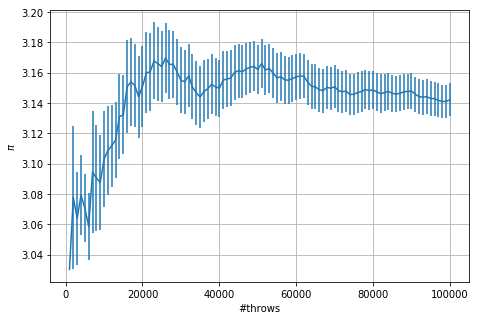

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [7.5, 5]

x, y, error = np.loadtxt("Esercizio1.3/Pi.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,y,yerr=error)
plt.xlabel('#throws')
plt.ylabel('$\pi$')
plt.grid(True)
plt.show()

We found a value of $\pi$ which is compatible with the real one because it is inside the error bars.